In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as spi


In [16]:
#3x3 matrix with all random values between 0 and 1
A = np.random.rand(3,3)
print("Matrix A:")
print(A)
A_trace = np.trace(A)
print("Trace of A:", A_trace)
A_det = np.linalg.det(A)
print("Determinant of A:", A_det)
v=np.linalg.eig(A)
print("Eigenvectors of A:")
print(v)

Matrix A:
[[0.13688524 0.87449032 0.30171116]
 [0.565181   0.65236232 0.11441586]
 [0.78317654 0.35655763 0.33521678]]
Trace of A: 1.1244643304528488
Determinant of A: -0.15631606031507317
Eigenvectors of A:
EigResult(eigenvalues=array([ 1.34812044, -0.47023651,  0.24658041]), eigenvectors=array([[-0.55399309, -0.74631771,  0.03928928],
       [-0.55244246,  0.31603706, -0.3214884 ],
       [-0.62281537,  0.58577338,  0.94609807]]))


In [17]:
#creating a tridiagonal matrix
n = 5
diagonal = 1 * np.ones(n)
off_diagonal = -1/2 * np.ones(n-1)
tridiagonal_matrix = np.diag(diagonal) + np.diag(off_diagonal, k=1) + np.diag(off_diagonal, k=-1)  
print("Tridiagonal Matrix:")
print(tridiagonal_matrix)

Tridiagonal Matrix:
[[ 1.  -0.5  0.   0.   0. ]
 [-0.5  1.  -0.5  0.   0. ]
 [ 0.  -0.5  1.  -0.5  0. ]
 [ 0.   0.  -0.5  1.  -0.5]
 [ 0.   0.   0.  -0.5  1. ]]


In [21]:
x=np.linspace(0,1,100)
f_vals=x**2
g_vals=np.sqrt(1-x**2)
f = lambda x: x**2
g = lambda x: np.sqrt(1-x**2)
ans1=spi.quad(f,0,1)
ans2=spi.quad(g,0,1)
print("The integral of f from 0 to 1 is:", ans1[0])
print("The integral of g from 0 to 1 is:", ans2[0])


The integral of f from 0 to 1 is: 0.33333333333333337
The integral of g from 0 to 1 is: 0.7853981633974481


In [23]:
x=np.linspace(0,1,1000)
f=np.cos(x)
#finding the point of intersection
ans=opt.brentq(lambda t: np.cos(t)-t,0,1)
exp_neg_x = np.exp(-x)
z=np.sin(x)
# use a scalar function for root finding
ans2=opt.brentq(lambda t: np.sin(t)-np.exp(-t),0,1)
print("The point of intersection of cos(x) and x is:", ans)
print("The point of intersection of sin(x) and exp(-x) is:", ans2)


The point of intersection of cos(x) and x is: 0.7390851332151559
The point of intersection of sin(x) and exp(-x) is: 0.5885327439821664


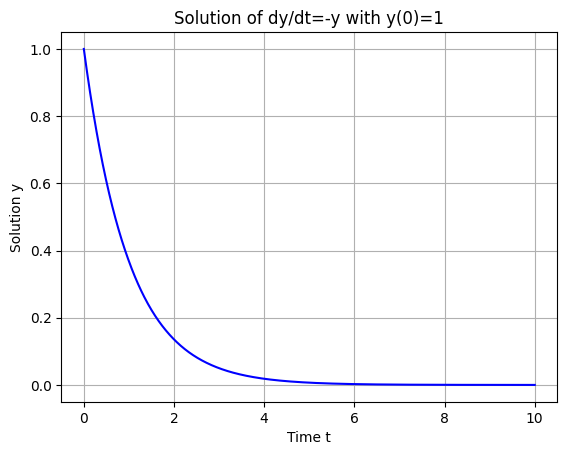

In [25]:
#solving the ivp dy/dt=-y, y(0)=1
def model(t,y):
    dydt=-y
    return dydt
from scipy.integrate import solve_ivp
sol=solve_ivp(model,[0,10],[1],t_eval=np.linspace(0,10,1000))
plt.plot(sol.t,sol.y[0],'b-')
plt.xlabel('Time t')
plt.ylabel('Solution y')
plt.title('Solution of dy/dt=-y with y(0)=1')
plt.grid()
plt.show()


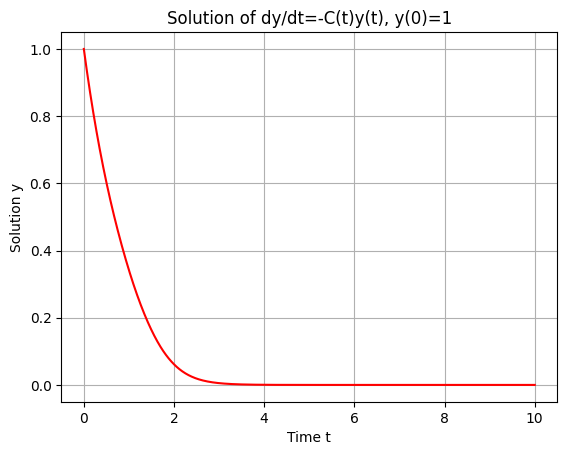

In [27]:
#solving the ivp dy/dt=-C(t)y(t), y(0)=1 where C(t)=1+\int^t_0 sin^2(s)ds,t∈[0,10]
def C(t):
    return 1 + spi.quad(lambda s: np.sin(s)**2, 0, t)[0]

def model2(t,y):
    dydt=-C(t)*y
    return dydt

sol2=solve_ivp(model2,[0,10],[1],t_eval=np.linspace(0,10,1000))
plt.plot(sol2.t,sol2.y[0],'r-')
plt.xlabel('Time t')
plt.ylabel('Solution y')
plt.title('Solution of dy/dt=-C(t)y(t), y(0)=1')
plt.grid()
plt.show()


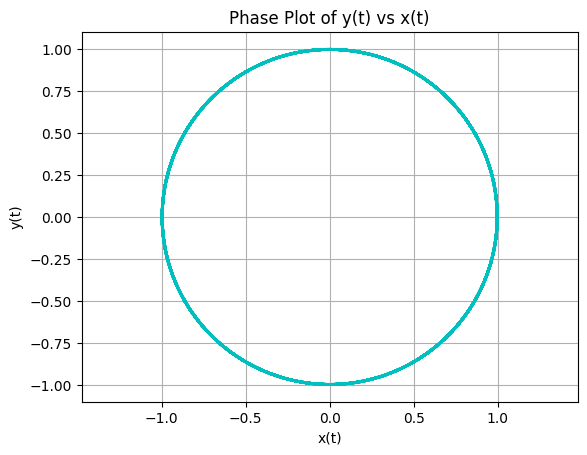

In [30]:
# solving the system d/dt[[x(t],[y(t)]]=[[-y(t)],[x(t)]],t∈[0,500]
def model3(t, z):
    x, y = z
    dxdt = -y
    dydt = x
    return [dxdt, dydt]
sol3 = solve_ivp(model3, [0, 500], [1, 0], t_eval=np.linspace(0, 500, 10000))

#plotting x,y against t
plt.plot(sol3.y[0], sol3.y[1], 'c-')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Phase Plot of y(t) vs x(t)')
plt.axis('equal')
plt.grid()
plt.show()



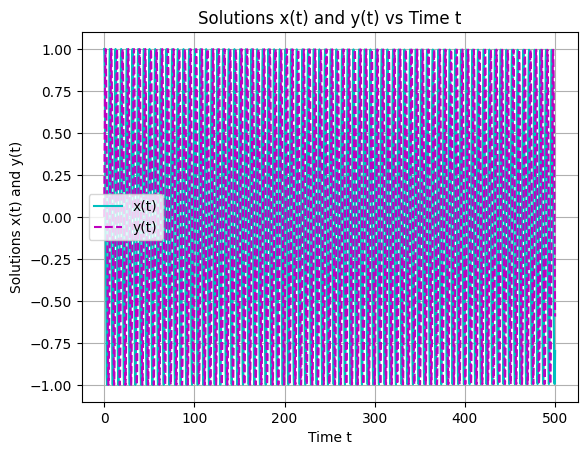

In [31]:
#plotting x,y against t
plt.plot(sol3.t, sol3.y[0], 'c-', label='x(t)')
plt.plot(sol3.t, sol3.y[1], 'm--', label='y(t)')
plt.xlabel('Time t')
plt.ylabel('Solutions x(t) and y(t)')
plt.title('Solutions x(t) and y(t) vs Time t')
plt.legend()
plt.grid()
plt.show()